# Exploratory Data Analysis (EDA)

## Datasets
- **customers.csv** (5,000 rows)
- **orders.csv** (20,000 rows)

These datasets are linked via a single common column: **customer_id**.

## Basic Dataset Information

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')

In [15]:
print("customers\n")
customers.head()

customers



,customer_id,country,age,gender,signup_year
0,1,Germany,47,Male,2021
1,2,France,40,Male,2023
2,3,UK,33,Male,2022
3,4,France,31,Male,2023
4,5,France,27,Male,2018


In [16]:
print("orders\n")
orders.head()

orders



,order_id,customer_id,order_amount,order_year,channel
0,1,1618,1044.89,2022,In-Store
1,2,3642,269.24,2019,In-Store
2,3,661,13.84,2022,Online
3,4,4165,158.85,2020,In-Store
4,5,320,140.07,2022,In-Store


In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5000 non-null   int64 
 1   country      5000 non-null   object
 2   age          5000 non-null   int64 
 3   gender       5000 non-null   object
 4   signup_year  5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      20000 non-null  int64  
 1   customer_id   20000 non-null  int64  
 2   order_amount  20000 non-null  float64
 3   order_year    20000 non-null  int64  
 4   channel       20000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 781.4+ KB


## Descriptive Statistics

In [8]:
customers.describe(include='all')

,customer_id,country,age,gender,signup_year
count,5000.000000,5000,5000.000000,5000,5000.000000
unique,NaN,5,NaN,2,NaN
top,NaN,France,NaN,Male,NaN
freq,NaN,1024,NaN,2551,NaN
mean,2500.500000,NaN,45.977800,NaN,2021.034600
std,1443.520003,NaN,16.388027,NaN,2.004846
min,1.000000,NaN,18.000000,NaN,2018.000000
25%,1250.750000,NaN,32.000000,NaN,2019.000000
50%,2500.500000,NaN,46.000000,NaN,2021.000000
75%,3750.250000,NaN,60.000000,NaN,2023.000000


In [7]:
orders.describe()

,order_id,customer_id,order_amount,order_year
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,2498.989650,239.337787,2021.510750
std,5773.647028,1437.604226,170.886960,1.706438
min,1.000000,1.000000,0.950000,2019.000000
25%,5000.750000,1263.000000,113.400000,2020.000000
50%,10000.500000,2504.500000,199.230000,2022.000000
75%,15000.250000,3727.000000,322.375000,2023.000000
max,20000.000000,5000.000000,1487.770000,2024.000000


## Distribution of Customer Ages

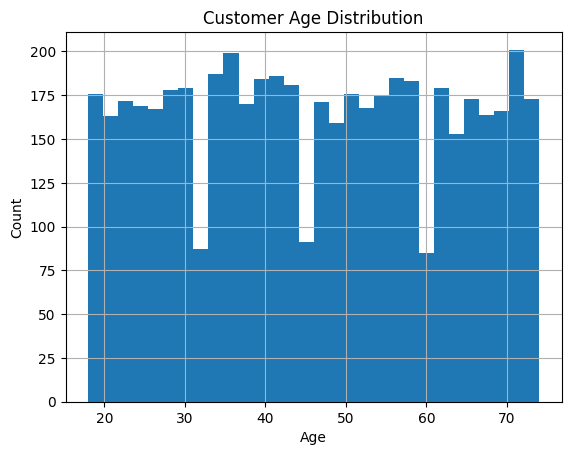

In [9]:
plt.figure()
customers['age'].hist(bins=30)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Orders by Sales Channel

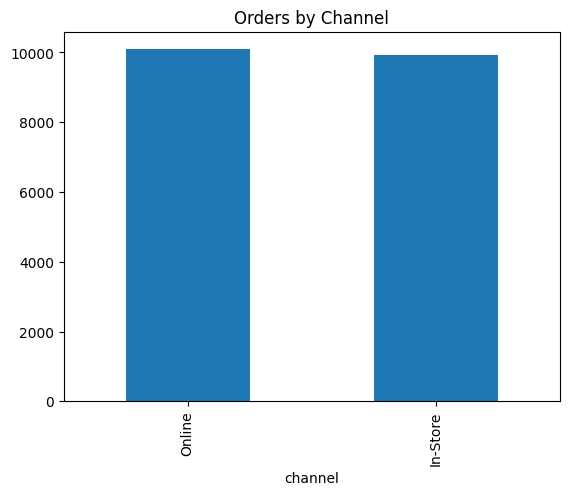

In [10]:
orders['channel'].value_counts().plot(kind='bar')
plt.title('Orders by Channel')
plt.show()

## Joining Datasets on customer_id

In [11]:
merged = orders.merge(customers, on='customer_id', how='inner')
merged.head()

,order_id,customer_id,order_amount,order_year,channel,country,age,gender,signup_year
0,1,1618,1044.89,2022,In-Store,USA,27,Male,2018
1,2,3642,269.24,2019,In-Store,UK,69,Male,2021
2,3,661,13.84,2022,Online,France,74,Male,2021
3,4,4165,158.85,2020,In-Store,UK,61,Female,2020
4,5,320,140.07,2022,In-Store,UK,62,Female,2022


## Average Order Amount by Country

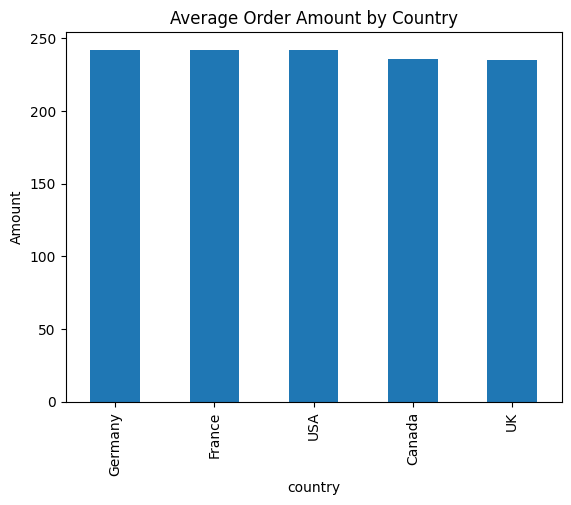

In [12]:
avg_by_country = merged.groupby('country')['order_amount'].mean().sort_values(ascending=False)
avg_by_country.plot(kind='bar')
plt.title('Average Order Amount by Country')
plt.ylabel('Amount')
plt.show()

## Order Amount vs Age

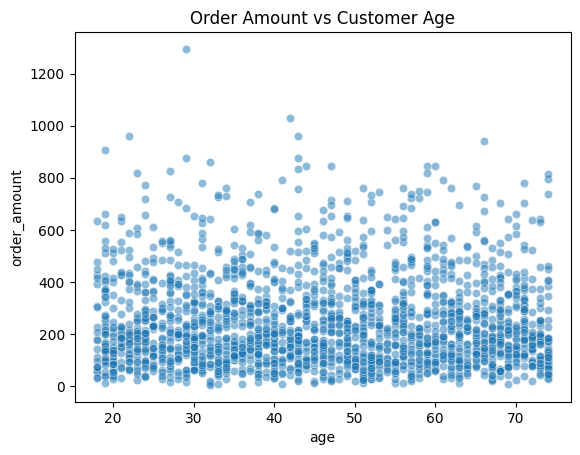

In [13]:
plt.figure()
sns.scatterplot(data=merged.sample(2000), x='age', y='order_amount', alpha=0.5)
plt.title('Order Amount vs Customer Age')
plt.show()

## Key Insights
- Customers span multiple countries and age groups
- Online and in-store channels are well balanced
- Average order value varies by country
- Weak correlation between age and order amount